# **Introduction**
Based on the given problem, which is to understand user engagement on Showwcase's platform, the following report will go in depth into factors affecting user engagement. In this report, we define user engagement by seeing whether or not the users on the platform are actually using their accounts, and to what extent they are using their accounts. Specifically, this report will focus on key factors including: Frequency of Engagement(the numbers of likes and comments given for each distinctive day in the month of October), Proportion of Engagement(Of the current users, how many are actively using their account?), and Duration on the Platform. Based on these metrics, it will be clearer as to what product areas require more attention.

In [179]:
#Rohit Mishra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Data Cleansing**

In [127]:
#cleans date column to be used for time series
def date_fix(date):
    date = str(date)
    if(date[4]== '/'):
        date = date[:3] + '0' + date[3:]
    return date
#returns proportion of each boolean category for decision tree
def bool_prop(cust_id):
    prop = cust_id/(df_user_bool.get('customer_id').sum())
    return prop

In [89]:
#reads the csv file
df_sessions = pd.read_csv('showwcase_sessions.csv').dropna()
#creates dataframe based on individual customers and aggregates by sum
df_user = df_sessions.groupby('customer_id').sum()
#creates dataframe based on each each date of the month
df_date = df_sessions.groupby('login_date').sum().reset_index()
df_date = df_date.assign(login_date = df_date['login_date'].apply(date_fix)).sort_values(by = 'login_date')
#creates dataframe based on boolean values
df_user_bool = df_sessions.groupby(['projects_added','likes_given','comment_given','inactive_status']).count()
df_user_bool = df_user_bool.drop(columns = ['session_id','login_date','bug_occured', 
                             'session_projects_added','session_likes_given',
                            'session_comments_given','inactive_duration',
                            'bugs_in_session','session_duration']).reset_index()
df_user_bool = df_user_bool.assign(prop = df_user_bool['customer_id'].apply(bool_prop))


After cleaning the data, specifically removing null values and reformatting/sorting the login_date values, I created multiple dataframes for visualizations, per the predefined metrics. This will show us key figures that will allow us to identify specified areas for improvement. 

# **Time-Series Trend**

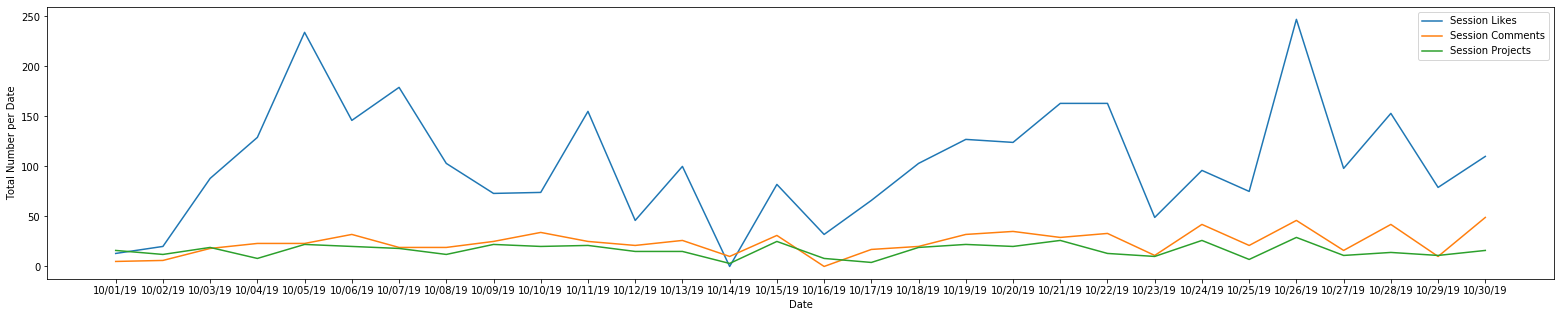

In [115]:
plt.figure(figsize=(27,5))
plt.plot(df_date['login_date'], df_date.get('session_likes_given'), label = 'Session Likes')
plt.plot(df_date['login_date'], df_date.get('session_comments_given'), label = 'Session Comments')
plt.plot(df_date['login_date'], df_date.get('session_projects_added'), label = 'Session Projects')
plt.xlabel('Date')
plt.ylabel('Total Number per Date')
plt.legend()
plt.show()


As we can see from this time-series graph, there is high volatility in the number of likes. There are two distinct peaks for likes, one at the beginning of the month and one at the end of the month. This could indicate that there may be a higher chance of likes being given out at the beginning and end of the months, so more focus could be given on engagement in the middle of the month to drive likes. However, the trend for comments and projects is very steady, and has little volatilty. Although there is steadiness, the number of comments and projects added should maintain a positive slope in order to ensure consistent growth.    

# **User Proportions**

In [119]:
df_user_bool.sort_values(by = 'prop')

,projects_added,likes_given,comment_given,inactive_status,customer_id,prop
0,False,False,False,False,1,0.003344
1,False,False,False,True,3,0.010033
5,False,True,False,True,5,0.016722
2,False,False,True,False,6,0.020067
4,False,True,False,False,7,0.023411
8,True,False,False,False,7,0.023411
3,False,False,True,True,11,0.036789
12,True,True,False,False,14,0.046823
9,True,False,False,True,15,0.050167
6,False,True,True,False,17,0.056856


# Probabilities explanation

Looking at the above table, there are multiple take-aways. Firstly, we have classified 16 different types of users. This is based on their boolean values, which indicates if they have added a project, given a like, given a comment, and if they are active. This was created by grouping the table values based on these pre-defined boolean values, and aggregating it with a sum of all customer id's that fit this description. This allows us to understand the likelihood of a user falling into any one of these categories. As we can see, there is a diverse range of interactions that users have with the platform. After creating a proportions table for each type of user, we can now see what types of users to focus on when increasing engagement. For instance, some users strictly only add projects and do not engage in any other manner (probability is very low at 0.023), while other users do not add projects but are engaged in every other way (probability is 0.0769). One interesting detail is that a user that has no engagement at all is incredibly low, at a probability of ~0.003. However, the proportion we want to increase the most is that of the user that engages in all aspects. Currently, it is at a proportion of ~0.194, which means that a less than a quarter of users are participating in all aspects (including active status). However, a proportion of approximately 0.22 users have engaged but are currently inactive. If efforts focus on converting those users to active users, then there will be a considerable increase in overall engagement in a given period. In addition, we can also use this table and data to train machine-learning models that will help us better analyze projected growth and help with classification of each type of user. 

# **Duration Analysis**

In [161]:
df_duration = df_sessions[['login_date','session_duration', 'inactive_duration']]
df_duration = df_duration.assign(login_date = df_duration['login_date'].apply(date_fix)).sort_values(by = 'login_date')

In [173]:
df_duration = df_duration.groupby('login_date').mean().reset_index()
df_duration = df_duration.assign(prop_duration = df_duration['inactive_duration']/df_duration['session_duration'])
df_duration

,login_date,session_duration,inactive_duration,prop_duration
0,10/01/19,1383.333333,587.888889,0.424980
1,10/02/19,1075.000000,1050.200000,0.976930
2,10/03/19,1264.500000,712.700000,0.563622
3,10/04/19,1139.000000,768.222222,0.674471
4,10/05/19,1114.857143,152.000000,0.136340
5,10/06/19,1320.250000,765.166667,0.579562
6,10/07/19,1156.000000,732.153846,0.633351
7,10/08/19,1086.000000,679.375000,0.625576
8,10/09/19,1369.900000,639.000000,0.466457
9,10/10/19,1097.285714,811.214286,0.739292


Text(0.5, 1.0, 'Average Inactive Duration on Date')

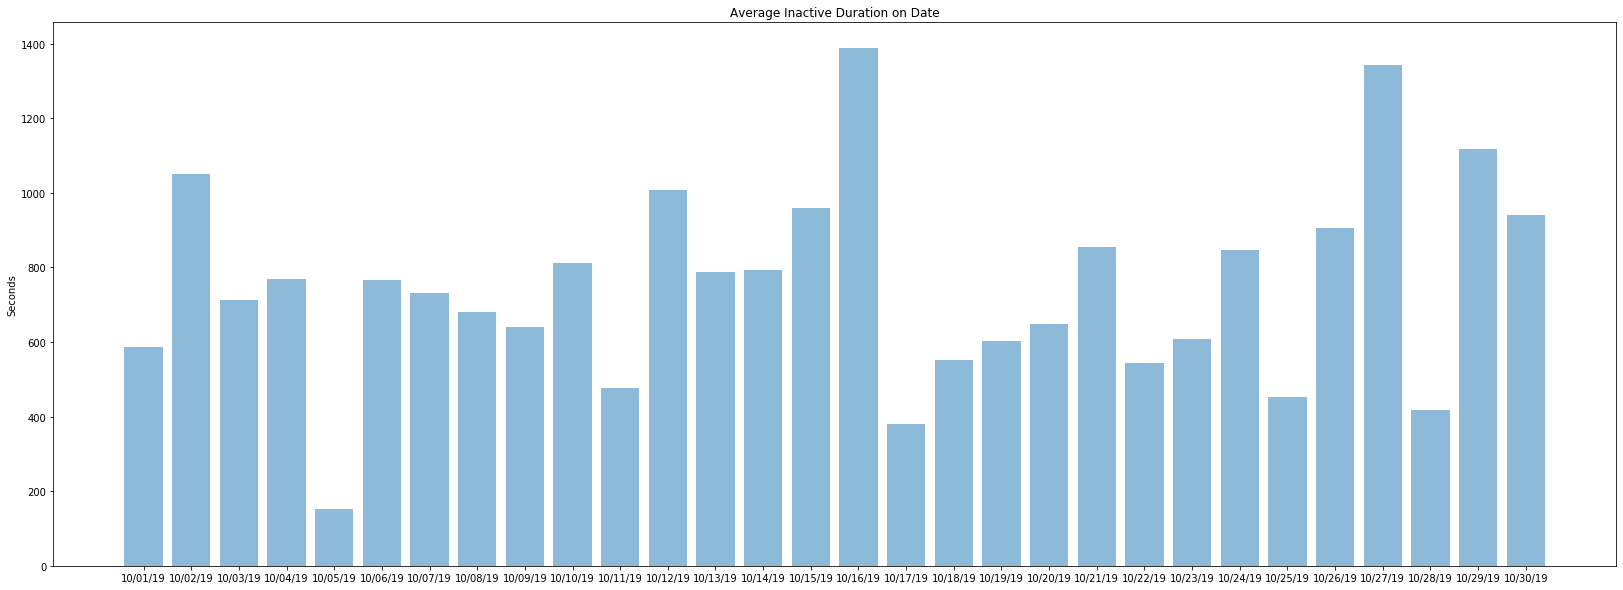

In [174]:
plt.figure(figsize=(28,10))
session_d = df_duration['session_duration']
inactive_d = df_duration['inactive_duration']
prop = df_duration['prop_duration']
date = df_duration['login_date']
 
plt.bar(date, inactive_d, align='center', alpha=0.5)
plt.ylabel('Seconds')
plt.title('Average Inactive Duration on Date')

Text(0.5, 1.0, 'Average Inactive Duration on Date')

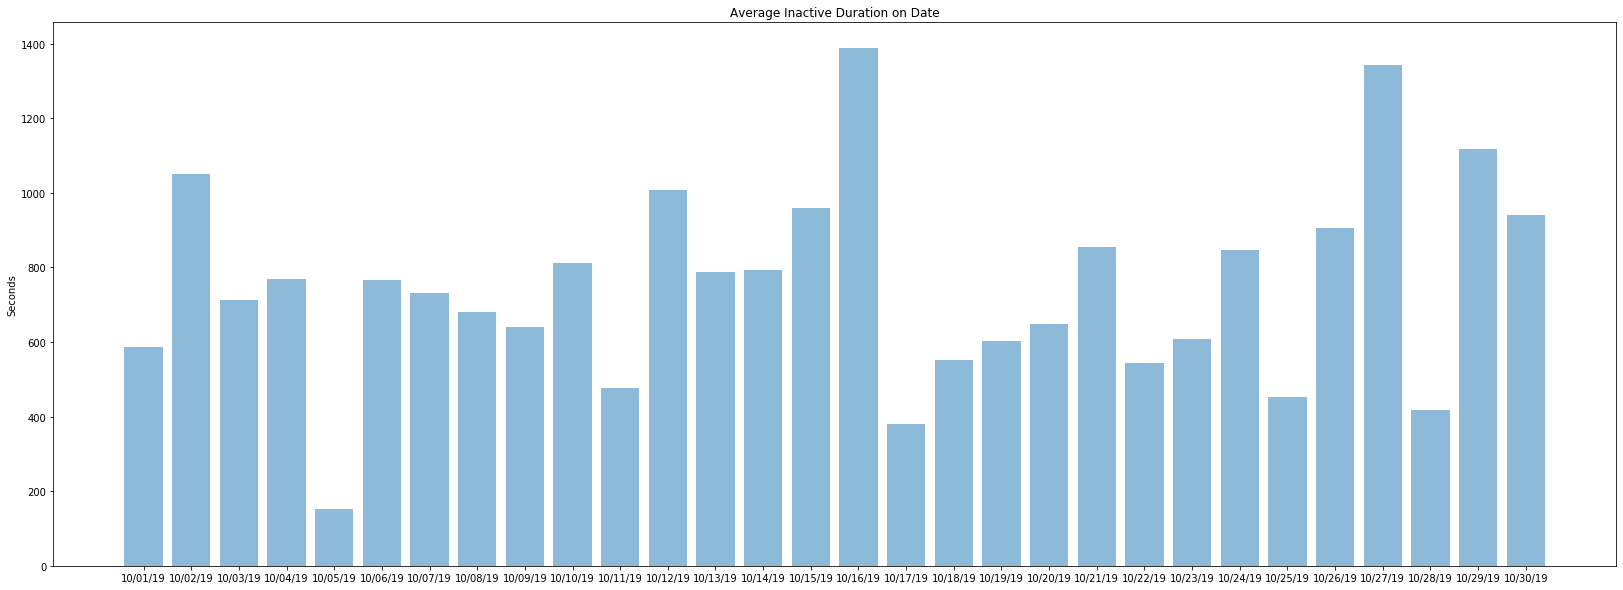

In [175]:
plt.figure(figsize=(28,10))
plt.bar(date, inactive_d, align='center', alpha=0.5)
plt.ylabel('Seconds')
plt.title('Average Inactive Duration on Date')

Text(0.5, 1.0, 'Proportion of Inactivity to Session Length')

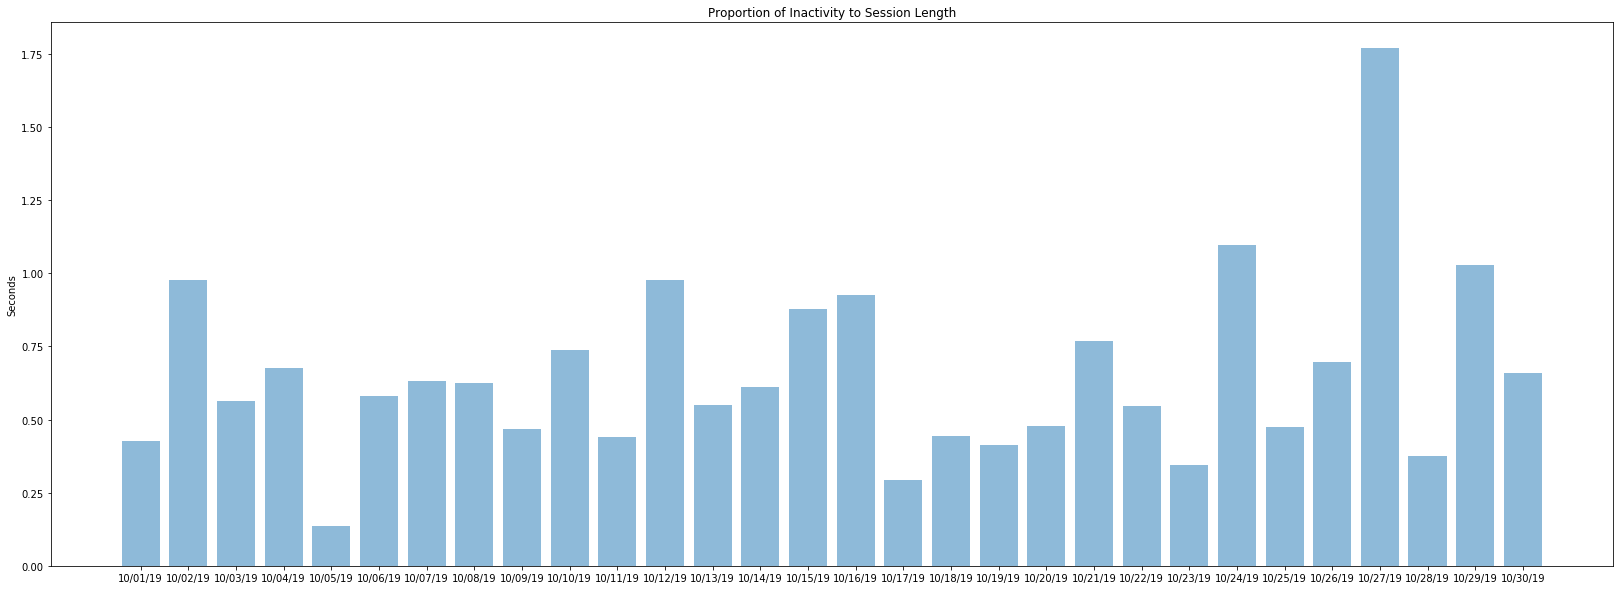

In [178]:
plt.figure(figsize=(28,10))
plt.bar(date,prop, align='center', alpha=0.5)
plt.ylabel('Seconds')
plt.title('Proportion of Inactivity to Session Length')

# Findings
Based on the bar charts above, we can see that the average Session Duration for each date is consistently higher than that of the Inactive Duration. However, the inactive duration is still relatively close to the session duration, which indicates that there should be more efforts to try and increase interaction on the platform to decrease idle time. In the third bar graph, however, we notice that the proportion of inactivity to session length is relatively high, so there should also be efforts to reduce that proportion.

# **Conclusion and Next Steps**

Based on the previous findings, the main areas of focus would be on increasing usage of the platform specific dates of the month (primarily the middle of the month, between the beginning and the end of the month), converting users who are classified as inactive to active users—thus increasing the overall proportion of fully engaged users (i.e. user retention)—and focusing on decreasing the proportion of inactivity during session length. 

As for next steps, the focus should be more on how to maintain long-term users. Although this data only covers a month, it will be important to understand how long each user keeps using the platform. Furthermore, A/B hypothesis testing in the future can allow us to discover which user groups will engage the most effectively. Overall, these findings are the first step and can provide insight into more complex methodologies that will yield results with higher accuracy. 